In [10]:
import spatialdata as sd
import spatialdata.io
import spatialdata_plot

In [13]:
data_path = '../data/Dummy data/data.zarr'
sdata = sd.read_zarr(data_path)
sdata

SpatialData object, with associated Zarr store: /media/Lynn/data/Dummy data/data.zarr
├── Images
│     └── 'raw_image': DataTree[cyx] (1, 6432, 6432), (1, 1608, 1608)
├── Labels
│     └── 'segmentation_mask': DataArray[yx] (6432, 6432)
├── Points
│     └── 'transcripts': DataFrame with shape: (<Delayed>, 3) (2D points)
├── Shapes
│     └── 'nucleus_boundaries': GeoDataFrame shape: (3375, 1) (2D shapes)
└── Tables
      └── 'table': AnnData (3375, 99)
with coordinate systems:
    ▸ 'global', with elements:
        raw_image (Images), segmentation_mask (Labels), transcripts (Points), nucleus_boundaries (Shapes)

In [14]:
sdata['raw_image']

<xarray.DataTree>
Group: /
├── Group: /scale0
│       Dimensions:  (c: 1, y: 6432, x: 6432)
│       Coordinates:
│         * c        (c) int64 8B 0
│         * y        (y) float64 51kB 0.5 1.5 2.5 3.5 ... 6.43e+03 6.43e+03 6.432e+03
│         * x        (x) float64 51kB 0.5 1.5 2.5 3.5 ... 6.43e+03 6.43e+03 6.432e+03
│       Data variables:
│           image    (c, y, x) uint16 83MB dask.array<chunksize=(1, 256, 256), meta=np.ndarray>
└── Group: /scale1
        Dimensions:  (c: 1, y: 1608, x: 1608)
        Coordinates:
          * c        (c) int64 8B 0
          * y        (y) float64 13kB 2.0 6.0 10.0 14.0 ... 6.422e+03 6.426e+03 6.43e+03
          * x        (x) float64 13kB 2.0 6.0 10.0 14.0 ... 6.422e+03 6.426e+03 6.43e+03
        Data variables:
            image    (c, y, x) uint16 5MB dask.array<chunksize=(1, 256, 256), meta=np.ndarray>

In [15]:
sd.get_pyramid_levels(sdata['raw_image'], n=0)

<xarray.DataArray 'image' (c: 1, y: 6432, x: 6432)> Size: 83MB
dask.array<from-zarr, shape=(1, 6432, 6432), dtype=uint16, chunksize=(1, 256, 256), chunktype=numpy.ndarray>
Coordinates:
  * c        (c) int64 8B 0
  * y        (y) float64 51kB 0.5 1.5 2.5 3.5 ... 6.43e+03 6.43e+03 6.432e+03
  * x        (x) float64 51kB 0.5 1.5 2.5 3.5 ... 6.43e+03 6.43e+03 6.432e+03
Attributes:
    transform:  {'global': Identity }

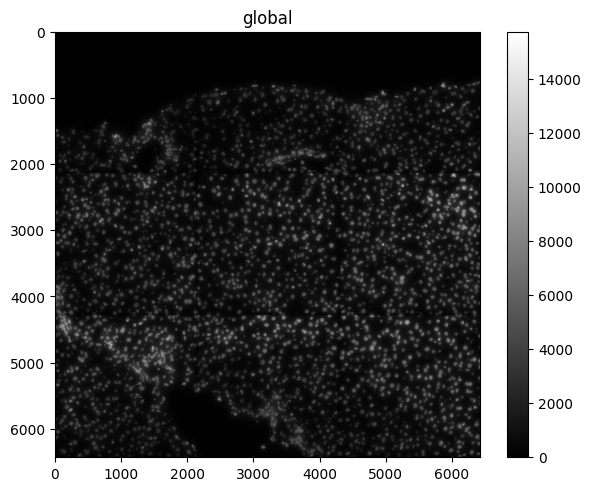

In [18]:
sdata.pl.render_images('raw_image', cmap="gray").pl.show()

INFO     Rasterizing image for faster rendering.                                                                   


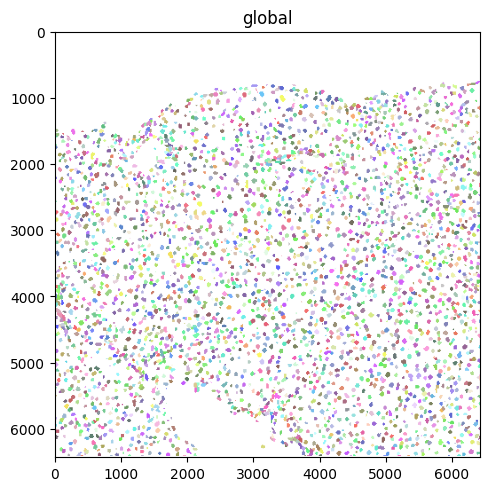

In [25]:
sdata.pl.render_labels().pl.show() #segmentation mask

/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/spatialdata/_core/_elements.py:105: UserWarning: Key `nucleus_boundaries` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/spatialdata/_core/_elements.py:125: UserWarning: Key `table` already exists. Overwriting it in-memory.
  self._check_key(key, self.keys(), self._shared_keys)
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/spatialdata_plot/pl/utils.py:771: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = color_source_vector.map(color_mapping)
/scratch/lyarab/micromamba/envs/spatialdata/lib/python3.12/site-packages/anndata/_core/anndata.py:401: FutureWarning: The dty

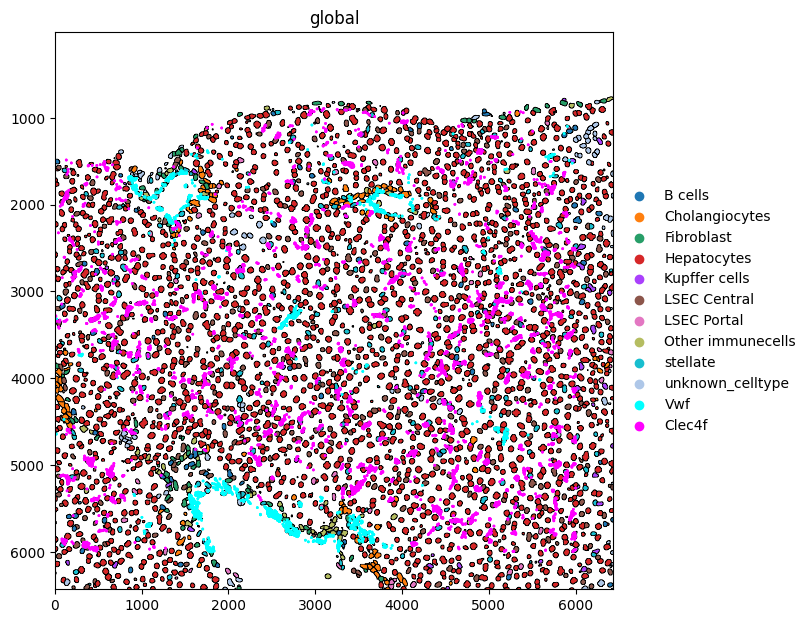

In [22]:
(
    sdata.pl.render_shapes(
        "nucleus_boundaries",
        color="annotation",
        outline_alpha=1.0,
        outline_width=0.5,
    )
    .pl.render_points(
        "transcripts",
        color="gene",
        groups="Vwf",
        palette="cyan",
    )
    .pl.render_points(
        "transcripts",
        color="gene",
        groups="Clec4f",
        palette="magenta",
    )
    .pl.show(figsize=(8, 8))
)


## Transformations and coordinate systems

In [23]:
import math

import matplotlib.pyplot as plt
import spatialdata
import spatialdata_plot
from spatialdata.transformations import (
    Affine,
    MapAxis,
    Scale,
    Sequence,
    Translation,
    get_transformation,
    set_transformation,
)

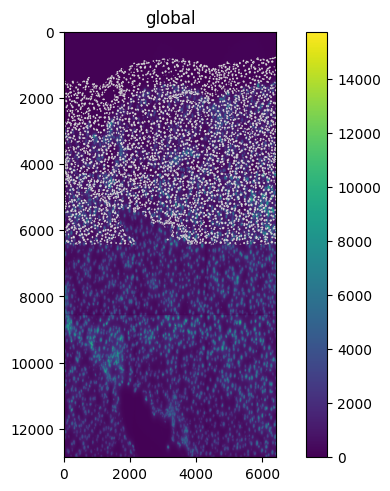

In [26]:
scale = Scale([2.0], axes=("y",)) #multiply y axis by 2

set_transformation(sdata.images["raw_image"], scale, to_coordinate_system="global")

sdata.pl.render_images().pl.render_shapes().pl.show()

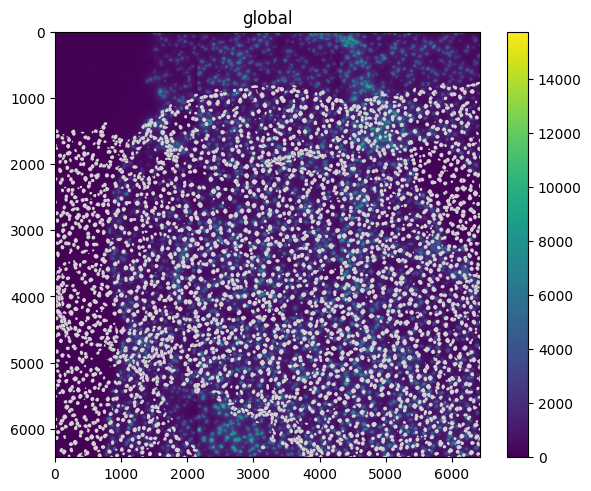

In [27]:
map_axis = MapAxis({"x": "y", "y": "x"}) #switch x and y axis

set_transformation(sdata.images["raw_image"], map_axis, to_coordinate_system="global")

sdata.pl.render_images().pl.render_shapes().pl.show()

INFO     Rasterizing image for faster rendering.                                                                   


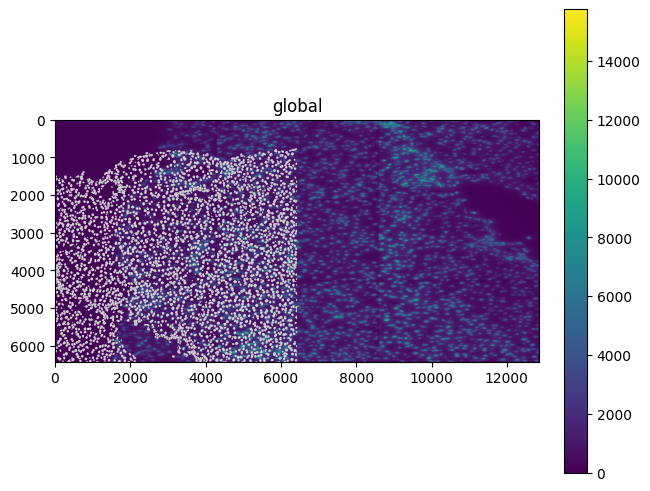

In [29]:
sequence = Sequence([scale, map_axis])

set_transformation(sdata.images["raw_image"], sequence, to_coordinate_system="global")

sdata.pl.render_images().pl.render_labels().pl.render_shapes().pl.show()

In [30]:
print(sequence.to_affine_matrix(input_axes=("x", "y"), output_axes=("x", "y"))) #print transformation matrix

[[0. 2. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]
